# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0   7  3   6  5933  1068  6199  DEFEAT
    1   7  0  10  3601   747     0  DEFEAT
    2   9  1   6  4352     0     0  DEFEAT
    3   7  7   2  2332  6325     0  DEFEAT
    4   6  4   2  3410  5979   606  DEFEAT
...    .. ..  ..   ...   ...   ...     ...
572 5   8  4  13  5641   568  6464  DEFEAT
    6  14  0  13  7376   403   217  DEFEAT
    7  12  0  14  8847  1158     0  DEFEAT
    8   7  8  14  4734  4517     0  DEFEAT
    9   6  8   8  4009  8756     0  DEFEAT

[5730 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5730 entries, (0, 0) to (572, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       5730 non-null   int64 
 1   A       5730 non-null   int64 
 2   D       5730 non-null   int64 
 3   DMG     5730 non-null   int64 
 4   H       5730 non-null   int64 
 5   MIT     5730 non-null   int64 
 6   GAME    5730 non-null   object
dtypes: int64(6), object(1)
memory usage: 351.2+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000
mean,14.000349,7.362304,6.482373,6299.783421,3851.328796,2377.759511
std,9.509511,8.179026,3.806149,4279.755572,5017.875965,4598.039145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.000000,2841.250000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,5635.500000,801.000000,373.500000
75%,20.000000,12.000000,9.000000,9236.000000,7477.250000,2032.750000
max,58.000000,54.000000,21.000000,26666.000000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0   7  3   6  5933  1068  6199  DEFEAT
    1   7  0  10  3601   747     0  DEFEAT
    2   9  1   6  4352     0     0  DEFEAT
    3   7  7   2  2332  6325     0  DEFEAT
    4   6  4   2  3410  5979   606  DEFEAT
...    .. ..  ..   ...   ...   ...     ...
572 5   8  4  13  5641   568  6464  DEFEAT
    6  14  0  13  7376   403   217  DEFEAT
    7  12  0  14  8847  1158     0  DEFEAT
    8   7  8  14  4734  4517     0  DEFEAT
    9   6  8   8  4009  8756     0  DEFEAT

[5730 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,17.960733,4.325480,6.187609,9171.926702,415.786213,9608.597731
std,10.047626,3.708788,3.669854,4067.037753,1134.711072,6035.607117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,4.000000,6150.250000,0.000000,5313.750000
50%,17.000000,3.000000,6.000000,9017.000000,0.000000,8520.500000
75%,24.000000,6.000000,8.000000,11753.500000,137.500000,12774.750000
max,58.000000,24.000000,21.000000,24682.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,17.265707,1.935864,7.207243,8279.612129,341.109948,626.784904
std,9.115850,2.582854,4.043660,3634.037148,545.226252,1106.887403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5639.500000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,7936.000000,1.500000,82.500000
75%,23.000000,3.000000,10.000000,10582.000000,517.000000,797.250000
max,52.000000,18.000000,21.000000,26666.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,8.754799,14.307155,5.904887,2883.883072,9079.318935,513.315009
std,6.822121,8.450740,3.498785,2146.728397,4055.678782,859.292604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,1314.250000,6144.250000,0.000000
50%,8.000000,14.000000,6.000000,2557.000000,8671.500000,211.000000
75%,13.000000,19.000000,8.000000,3938.750000,11514.250000,636.250000
max,52.000000,54.000000,21.000000,16254.000000,27756.000000,7778.000000


그림 저장:tank_hist


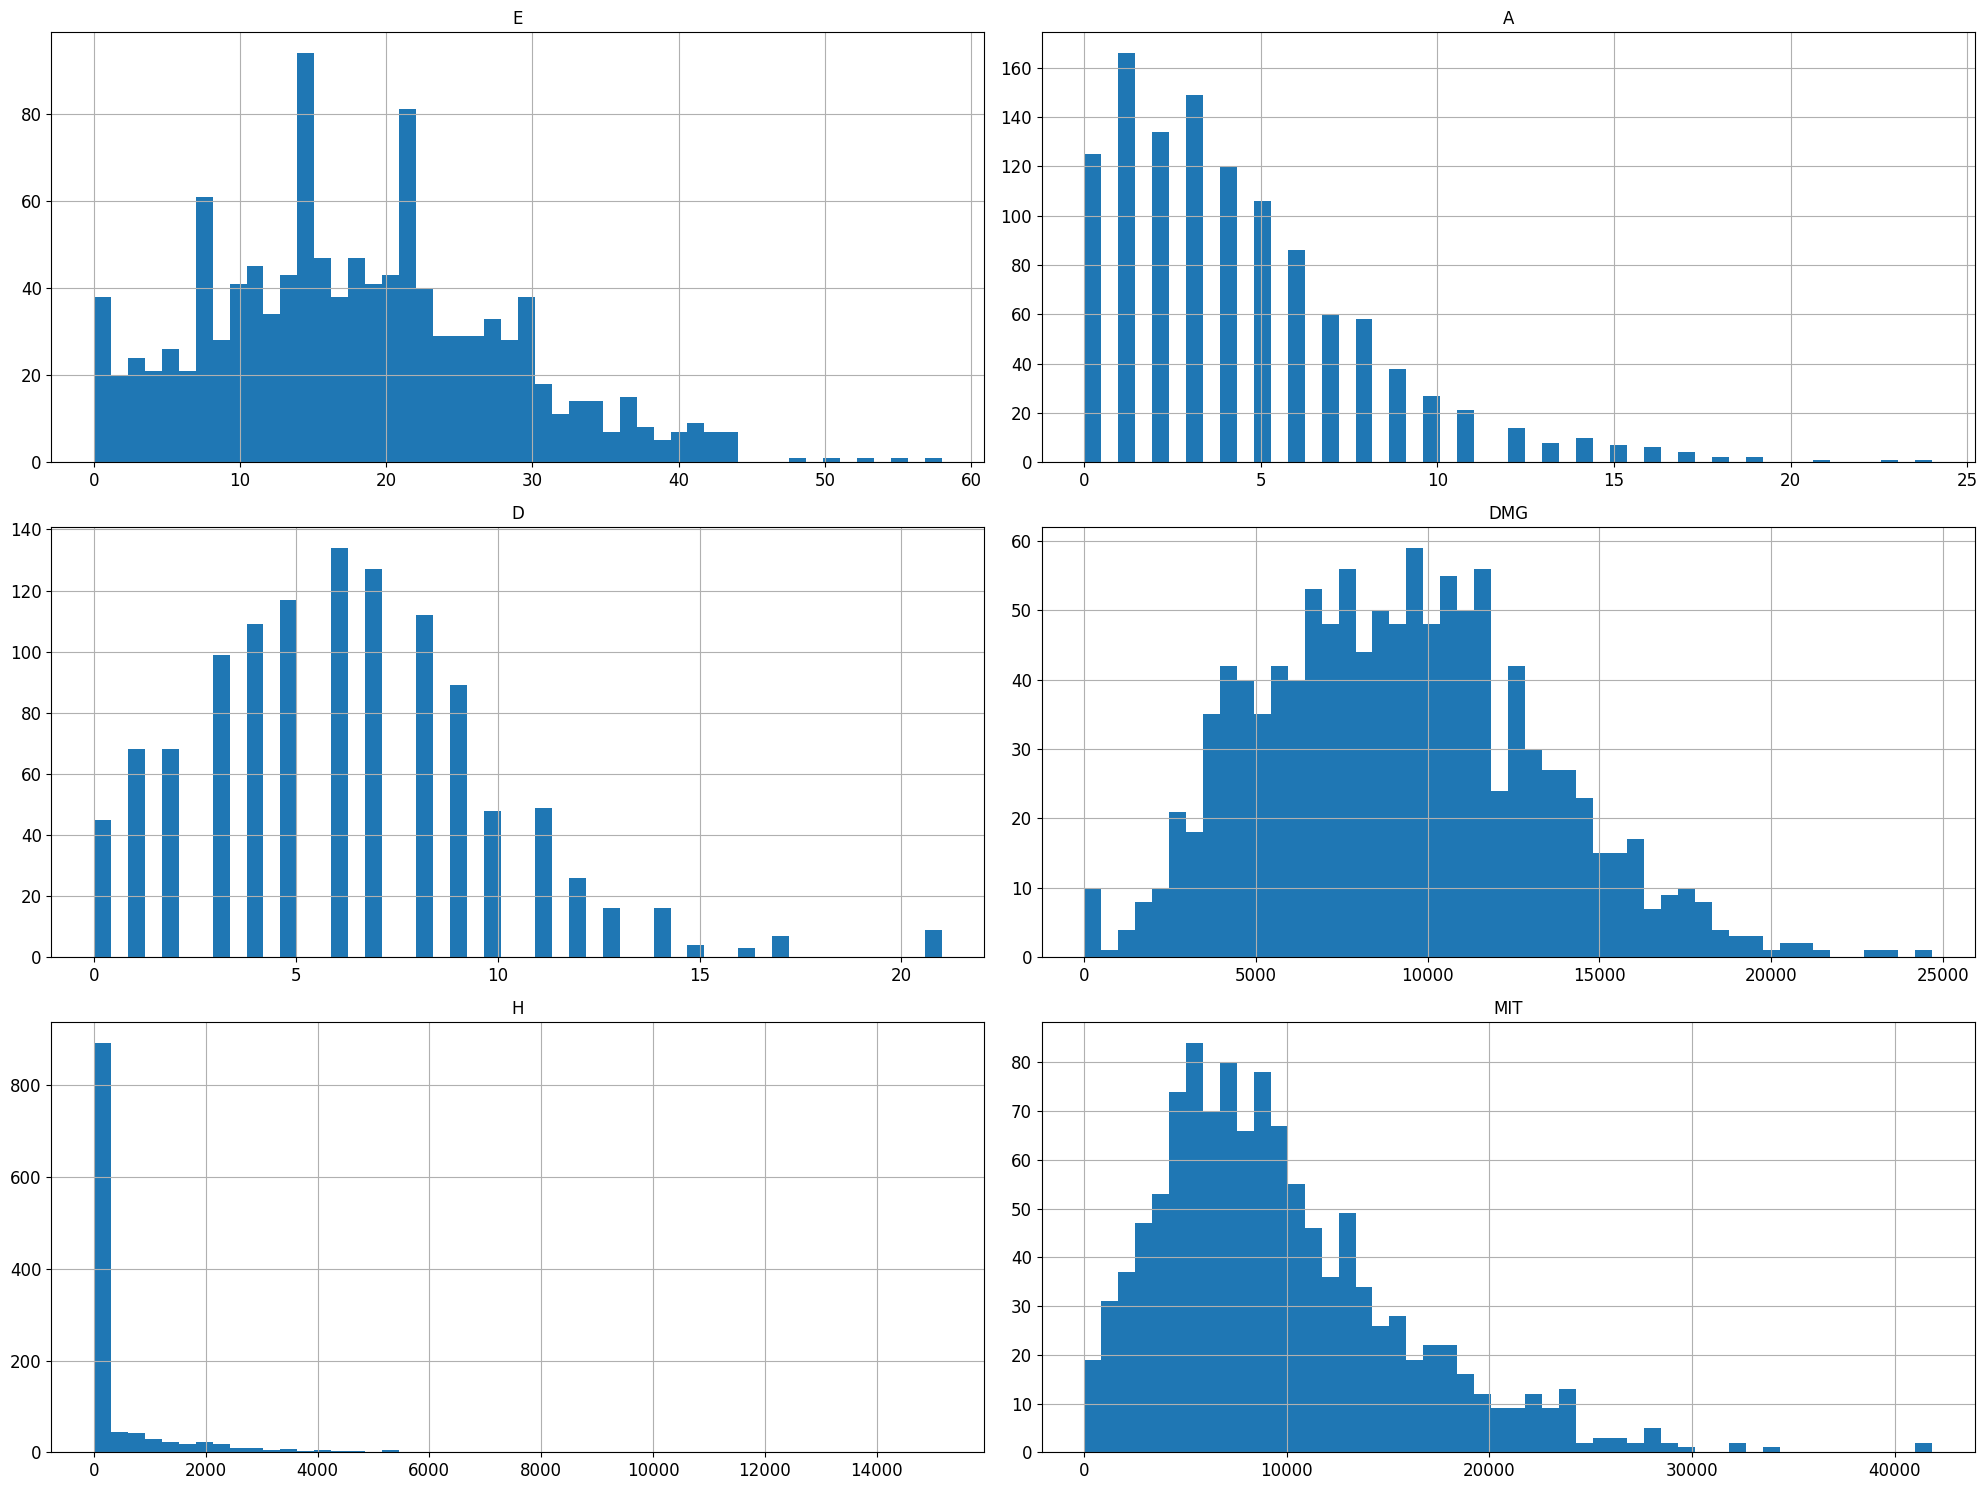

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


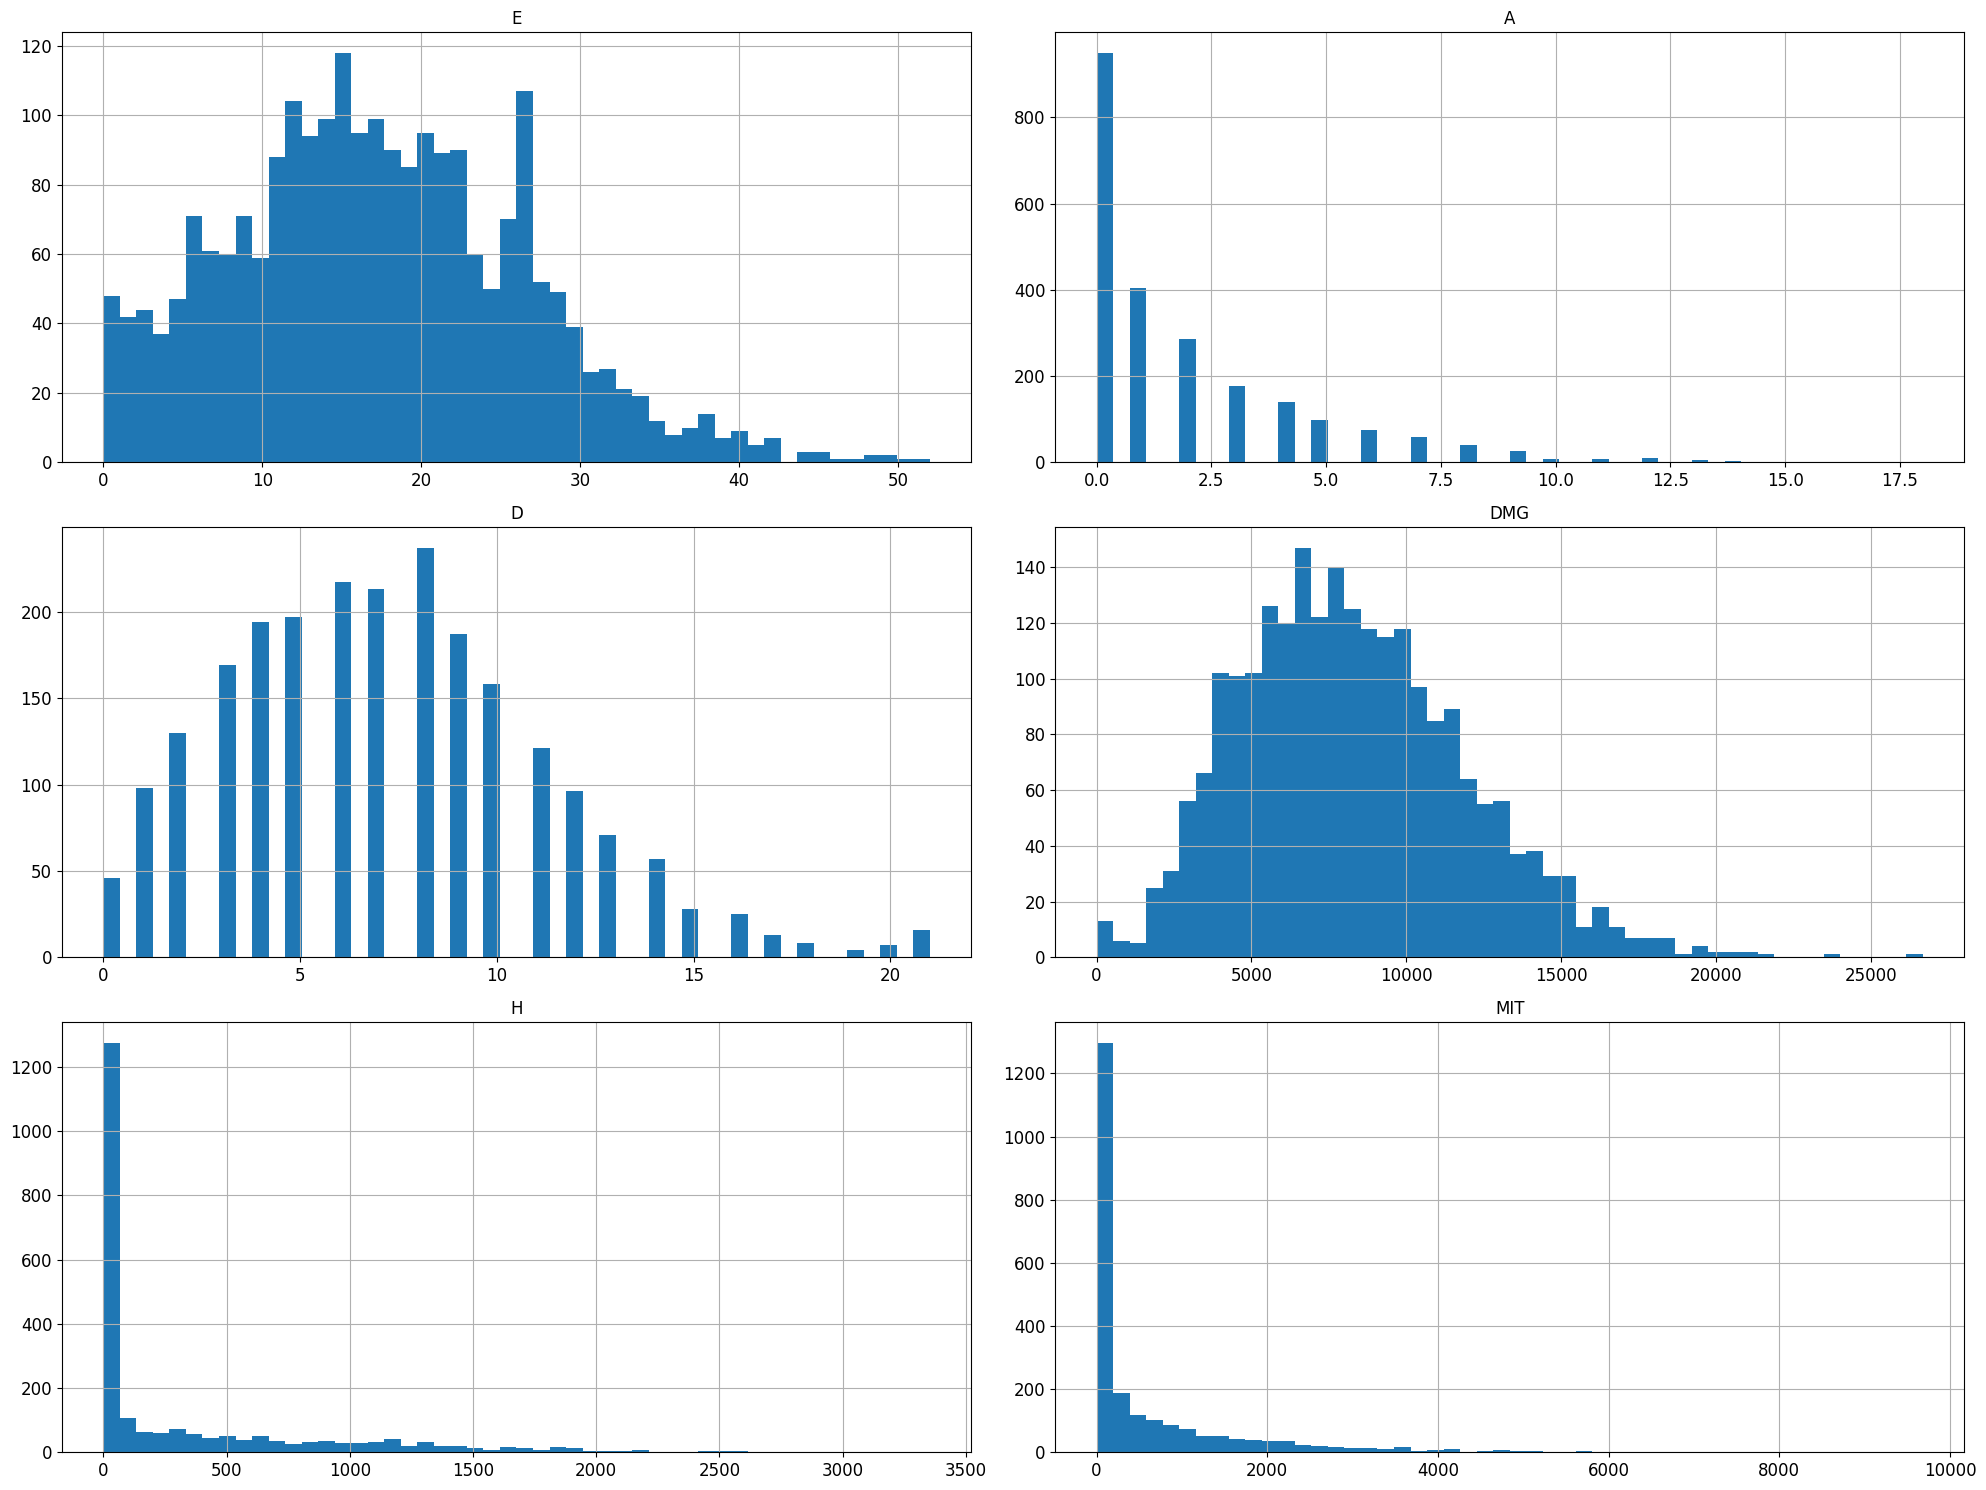

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


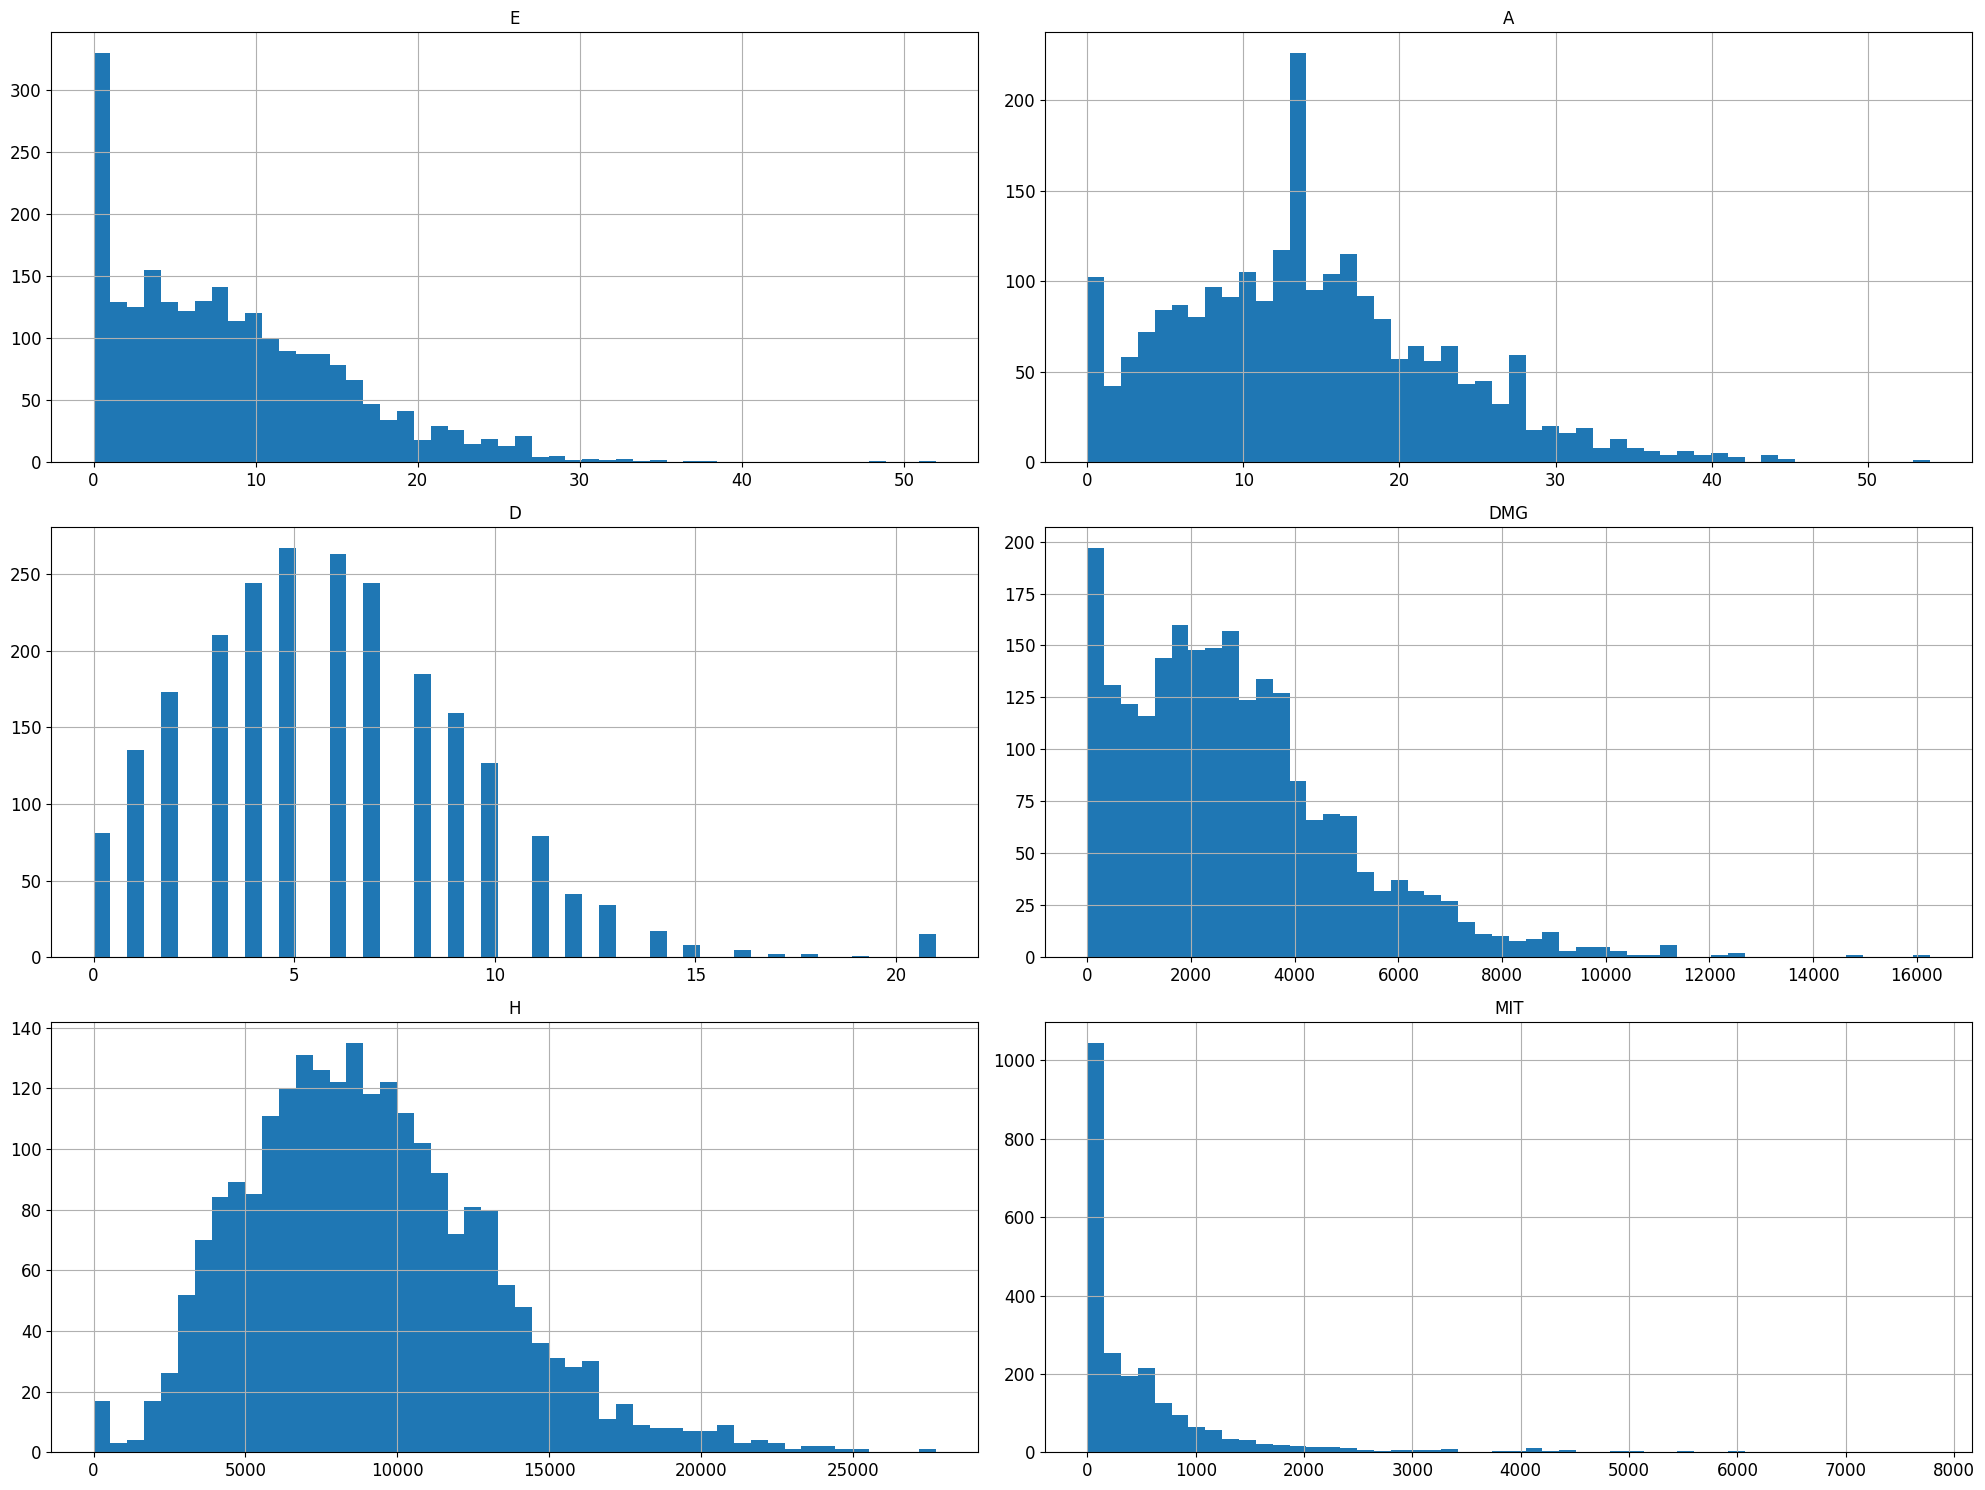

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
270 0  20   1   2  10649      0  22492  VICTORY
    1  20   0   5   6483      0    878  VICTORY
    2  15   4   3   5991      0      0  VICTORY
    3  12  16   1   3487  10091      0  VICTORY
    4   5  12   1   2350   9626    468  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
416 5  14   5  10  10371      0  10730   DEFEAT
    6  15   1  11  11082      0    198   DEFEAT
    7  17   3  16  11335      0      0   DEFEAT
    8   8  11  14   2354  12627    246   DEFEAT
    9  10  14  10   4299  14848      0   DEFEAT

[5730 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
270 0  0.344828  0.018519  0.095238  0.399347  0.000000  0.537456
    1  0.344828  0.000000  0.238095  0.243119  0.000000  0.020980
    2  0.258621  0.074074  0.142857  0.224668  0.000000  0.000000
    3  0.206897  0.296296  0.047619  0.130766  0.363561  0.000000
    4  0.086207  0.222222  0.047619  0.088127  0.346808  0.011183
...         ...       ...       ...       ...       ...       ...
416 5  0.241379  0.092593  0.476190  0.388922  0.000000  0.256398
    6  0.258621  0.018519  0.523810  0.415585  0.000000  0.004731
    7  0.293103  0.055556  0.761905  0.425073  0.000000  0.000000
    8  0.137931  0.203704  0.666667  0.088277  0.454929  0.005878
    9  0.172414  0.259259  0.476190  0.161217  0.534947  0.000000

[5730 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(573, 60)
(573,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.90434783, 0.92173913, 0.91304348, 0.92982456, 0.92982456])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.53913043, 0.56521739, 0.56521739, 0.55263158, 0.55263158])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.90434783, 0.86956522, 0.89565217, 0.88596491, 0.90350877])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9197559115179252),
 (LogisticRegression(n_jobs=-1), 0.918001525553013),
 (RidgeClassifierCV(), 0.9162623951182305),
 (RidgeClassifier(), 0.9145232646834478),
 (NuSVC(), 0.9127993897787949),
 (ExtraTreesClassifier(n_jobs=-1), 0.9110450038138825),
 (LinearSVC(dual='auto'), 0.9110297482837527),
 (SVC(), 0.907581998474447),
 (NearestCentroid(), 0.9075667429443172),
 (GradientBoostingClassifier(), 0.9039816933638443),
 (HistGradientBoostingClassifier(), 0.9022730739893211),
 (RandomForestClassifier(n_jobs=-1), 0.8970556826849732),
 (KNeighborsClassifier(n_jobs=-1), 0.8953165522501907),
 (BaggingClassifier(n_jobs=-1), 0.8900381388253242),
 (MLPClassifier(max_iter=3200), 0.8865903890160183),
 (AdaBoostClassifier(), 0.8813119755911518),
 (SGDClassifier(n_jobs=-1), 0.8796491228070176),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8760640732265447),
 (Perceptron(n_jobs=-1), 0.8586727688787186),
 (DecisionTreeClassifier(), 0.80279176201373),
 (Ex

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum() / 2, importances_support.sum() / 2),
                    ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damage / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_support / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.30
죽음: 0.28
도움: 0.20
피해: 0.09
치유: 0.06
경감: 0.06

**1인 역할 중요도**
돌격: 0.28
지원: 0.19
공격: 0.17

**1인 돌격 특성 중요도**
죽음: 0.10
처치: 0.09
도움: 0.04
피해: 0.02
경감: 0.01
치유: 0.01

**1인 공격 특성 중요도**
처치: 0.07
죽음: 0.04
피해: 0.02
도움: 0.02
치유: 0.01
경감: 0.01

**1인 지원 특성 중요도**
도움: 0.06
죽음: 0.05
처치: 0.03
치유: 0.02
피해: 0.01
경감: 0.01


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (259)
       E   A   D    DMG      H    MIT     GAME
2580  27   7   9  16302    639  12059   DEFEAT
2581  30   5   9  14999      0      0   DEFEAT
2582  19   4  17  11566      0    402   DEFEAT
2583  17  18   9   6896  12834   1093   DEFEAT
2584  13  22  11   5898  12442      0   DEFEAT
2585  34   4   5  14474      0   8245  VICTORY
2586  29   5  10  13849   1842     18  VICTORY
2587  34   5  14  14818    403    199  VICTORY
2588  21  27   7   9583  14884    195  VICTORY
2589   6  26   8   2294  13388    500  VICTORY
TEAM 1: 0.91 1.15 0.65 0.94 0.89
TEAM 2: 1.09 1.10 1.09 1.20 0.98

DEFEAT (258)
       E   A   D    DMG      H    MIT     GAME
2570  14   0  15  11660    575   9859   DEFEAT
2571  13   5  14  11285     70    185   DEFEAT
2572  14   1  11  11700      0   1049   DEFEAT
2573   8   6   6   5923  10606   1076   DEFEAT
2574  10  11  10   6944  10458      0   DEFEAT
2575  24   5   6  13229      0  18015  VICTORY
2576  26   2  10  10378      0    965  VICTORY
2577  36   0  

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (314)
       E   A   D    DMG      H    MIT     GAME
3130  35   5   4  11173      0  15757  VICTORY
3131  40   5   3   9922      0      0  VICTORY
3132  30   6  11   8310    274      0  VICTORY
3133  26  31   3   8285   6022      0  VICTORY
3134  28  34   2   3966  11128      0  VICTORY
3135   8   4  13   5641    568   6464   DEFEAT
3136  14   0  13   7376    403    217   DEFEAT
3137  12   0  14   8847   1158      0   DEFEAT
3138   7   8  14   4734   4517      0   DEFEAT
3139   6   8   8   4009   8756      0   DEFEAT
TEAM 1: 1.44 1.61 1.12 1.37 1.47
TEAM 2: 0.56 0.66 0.61 0.47 0.69

VICTORY (313)
       E   A   D    DMG      H    MIT     GAME
3120  23   3   7  12673      0  12600  VICTORY
3121  26   0   9  14435      0    460  VICTORY
3122  25   0   6  11378    888    645  VICTORY
3123  12  17   7   4496  10343    169  VICTORY
3124  19  21   9   6073   9305    359  VICTORY
3125  22   1  11  10242      0  13091   DEFEAT
3126  28   1   7  13153      0    727   DEFEAT
3127  16   1

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2024-02-22 13:45:07.635235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 13:45:11.273426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-02-22 13:45:11.528479: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 13:45:11.528761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 13:45:11.532405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 13:45:11.532652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 13:45:11.532854: I tensorflow/compile

In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2024-02-22 13:45:13.135593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-22 13:45:13.275188: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7a8cc28cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-22 13:45:13.275234: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-02-22 13:45:13.422591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-02-22 13:45:13.687147: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-22 13:45:13.878359: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 [==============================] - 2s 15ms/step - loss: 0.6761 - accuracy: 0.7226 - val_loss: 0.6697 - val_accuracy: 0.6667
Epoch 2/256
14/14 [==============================] - 0s 7ms/step - loss: 0.6679 - accuracy: 0.6224 - val_loss: 0.6611 - val_accuracy: 0.6944
Epoch 3/256
14/14 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6783 - val_loss: 0.6527 - val_accuracy: 0.7153
Epoch 4/256
14/14 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.7203 - val_loss: 0.6441 - val_accuracy: 0.7014
Epoch 5/256
14/14 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.7389 - val_loss: 0.6361 - val_accuracy: 0.6944
Epoch 6/256
14/14 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.7226 - val_loss: 0.6284 - val_accuracy: 0.7153
Epoch 7/256
14/14 [==============================] - 0s 6ms/step - loss: 0.6291 - accuracy: 0.7436 - val_loss: 0.6207 - val_accuracy: 0.7778
Epoch 8/256
14/14 [=====

(0.23710471391677856, 0.9305555820465088)